In [60]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [81]:
Dataset = pd.read_csv('tabela-fipe-historico-precos.csv')
Dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
Dataset['marca'] = Dataset['marca'].str.upper()
Dataset['modelo'] = Dataset['modelo'].str.upper()
Dataset['Drop'] = Dataset['anoModelo'] - Dataset['anoReferencia']
Dataset = Dataset.sort_values(by=['Drop'], ignore_index=True, ascending=False)
Dataset = Dataset[(Dataset.Drop <0)]
Dataset.drop(['Drop'], axis=1, inplace=True)
Dataset.head(2)

,codigoFipe,marca,modelo,anoModelo,mesReferencia,anoReferencia,valor
115402,025234-4,RENAULT,DUSTER DAKAR 4X4 2.0 HI-FLEX 16V MEC.,2018,12,2019,73668.0
115403,023130-4,NISSAN,MARCH SV 1.0 12V FLEX 5P,2020,8,2021,52830.0


In [82]:
Lista_Marca = Dataset.loc[:,['marca']]
Lista_Marca = Lista_Marca.drop_duplicates()
Lista_Marca = Lista_Marca.sort_values(by=['marca'], ignore_index = True, ascending = True)
Lista_Marca.head()

,marca
0,ACURA
1,AGRALE
2,ALFA ROMEO
3,ASIA MOTORS
4,ASTON MARTIN


In [83]:
marca_escolhida = str(input('Digite uma marca que está na lista a cima: ')).upper()
marca_escolhida

'ALFA ROMEO'

In [84]:
Dataset = Dataset[(Dataset.marca == marca_escolhida)]
Modelo = Dataset[['marca', 'modelo']]
Modelo = Modelo.drop_duplicates()
Modelo = Modelo.sort_values(by=['modelo'], ignore_index = True, ascending = True)
Modelo.head(2)

,marca,modelo
0,ALFA ROMEO,145 ELEGANT 1.7/1.8 16V
1,ALFA ROMEO,145 ELEGANT 2.0 16V


In [85]:
Modelo_Escolhido = str(input('Escolha uma modelo: ')).upper()


,marca,modelo
0,ALFA ROMEO,145 ELEGANT 1.7/1.8 16V
1,ALFA ROMEO,145 ELEGANT 2.0 16V


In [87]:
Dataset = Dataset[(Dataset.modelo == Modelo_Escolhido )]
Dataset = Dataset.sort_values(by=['anoReferencia' , 'mesReferencia'], ignore_index = True, ascending = True)
Dataset.head(5)


,codigoFipe,marca,modelo,anoModelo,mesReferencia,anoReferencia,valor
0,006001-1,ALFA ROMEO,145 ELEGANT 2.0 16V,1998,1,2001,26764.0
1,006001-1,ALFA ROMEO,145 ELEGANT 2.0 16V,1998,2,2001,26603.0
2,006001-1,ALFA ROMEO,145 ELEGANT 2.0 16V,1998,3,2001,26314.0
3,006001-1,ALFA ROMEO,145 ELEGANT 2.0 16V,1998,4,2001,26172.0
4,006001-1,ALFA ROMEO,145 ELEGANT 2.0 16V,1998,5,2001,26170.0


In [88]:
Base = Dataset.copy()
Base.head(2)

,codigoFipe,marca,modelo,anoModelo,mesReferencia,anoReferencia,valor
0,006001-1,ALFA ROMEO,145 ELEGANT 2.0 16V,1998,1,2001,26764.0
1,006001-1,ALFA ROMEO,145 ELEGANT 2.0 16V,1998,2,2001,26603.0


# **Aplicando o modelo de Machine Learning utilizando a Regressão logística**

R² = 0.3846 Quanto a linha de regressão ajusta-se aos dados
R² = 0.7829 Previsões do nosso modelo


,Data,Valores
0,01-09-2022,14265.0
1,01-10-2022,14180.0
2,01-11-2022,14141.0
3,01-12-2022,14141.0


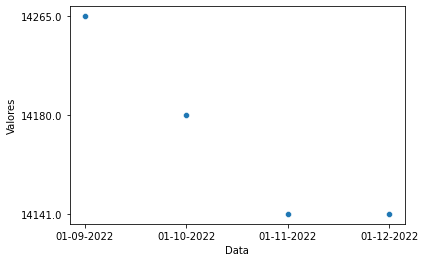

In [100]:
from sklearn.linear_model import LogisticRegression
Previsao_valores_logistica = list()
Data_Previsao_logistica = list()

#Aplicando OrdinalEncoder
enc = OrdinalEncoder()

Base[["codigoFipe","marca", "modelo", "anoModelo", "mesReferencia", "anoReferencia"]] = enc.fit_transform(Base[["codigoFipe","marca", "modelo", "anoModelo", "mesReferencia", "anoReferencia"]])
X = Base[Base.columns[0:6]].values
y = Base.loc[:,'valor'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.shape
X_test.shape
X_train.shape[0] + X_test.shape[0]
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

print('R² = {} Quanto a linha de regressão ajusta-se aos dados'.format(modelo.score(X_train, y_train).round(4)))
### Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"
y_previsto = modelo.predict(X_test)
### Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo
print('R² = %s Previsões do nosso modelo' % metrics.r2_score(y_test, y_previsto).round(4))




##########################################################
### Criando um simulador simples
Codigo_Fipe=0.0
Marca=0.0
Modelo=0.0
Ano_do_Modelo=0.0
#simulando tabela fipe do mês de setembro
Mês_Referencia=8.0
#simulando tabela fipe do ano de 2022
Ano_Referencia=15.0
entrada=[[Codigo_Fipe, Marca, Modelo, Ano_do_Modelo, Mês_Referencia, Ano_Referencia ]]
Set = modelo.predict(entrada)[0]

Data_Previsao_logistica.append('01/09/2022')
Set = Set.round(2)
Previsao_valores_logistica.append(Set)




##########################################################
### Criando um simulador simples
Codigo_Fipe=0.0
Marca=0.0
Modelo=0.0
Ano_do_Modelo=0.0
#simulando tabela fipe do mês de outubro
Mês_Referencia=9.0
#simulando tabela fipe do ano de 2022
Ano_Referencia=15.0
entrada=[[Codigo_Fipe, Marca, Modelo, Ano_do_Modelo, Mês_Referencia, Ano_Referencia ]]
Out = modelo.predict(entrada)[0]

Data_Previsao_logistica.append('01/10/2022')
Out = Out.round(2)
Previsao_valores_logistica.append(Out)



##########################################################
### Criando um simulador simples
Codigo_Fipe=0.0
Marca=0.0
Modelo=0.0
Ano_do_Modelo=0.0
#simulando tabela fipe do mês de novembro
Mês_Referencia=10.0
#simulando tabela fipe do ano de 2022
Ano_Referencia=15.0
entrada=[[Codigo_Fipe, Marca, Modelo, Ano_do_Modelo, Mês_Referencia, Ano_Referencia ]]
Nov = modelo.predict(entrada)[0]

Data_Previsao_logistica.append('01/11/2022')
Nov = Nov.round(2)
Previsao_valores_logistica.append(Nov)

##########################################################



Codigo_Fipe=0.0
Marca=0.0
Modelo=0.0
Ano_do_Modelo=0.0
#simulando tabela fipe do mês de dezembro
Mês_Referencia=11.0
#simulando tabela fipe do ano de 2022
Ano_Referencia=15.0
entrada=[[Codigo_Fipe, Marca, Modelo, Ano_do_Modelo, Mês_Referencia, Ano_Referencia ]]
Dez = modelo.predict(entrada)[0]

Data_Previsao_logistica.append('01/12/2022')
Dez = Dez.round(2)
Previsao_valores_logistica.append(Dez)




#unificando listas
Previsao_Df_logistica = list(zip(Data_Previsao_logistica,Previsao_valores_logistica))

#criando dataframe pandas
estrutura_df = {
    'Data': str,
    'Valores': str
}

Previsao_Df_logistica = pd.DataFrame(Previsao_Df_logistica, dtype=str)
Previsao_Df_logistica.columns = estrutura_df.keys()
Previsao_Df_logistica = Previsao_Df_logistica.astype(estrutura_df)

#transformando coluna em data
Previsao_Df_logistica["Data"] = pd.to_datetime(Previsao_Df_logistica["Data"])
#sequencia dia mes ano
Previsao_Df_logistica['Data'] = Previsao_Df_logistica['Data'].dt.strftime('%m-%d-%Y')
import seaborn as sns 
sns.scatterplot(x="Data", y="Valores", data=Previsao_Df_logistica)
Previsao_Df_logistica



# **Aplicando o modelo de Machine Learning utilizando a Regressão Linear**

R² = 0.6856 Quanto a linha de regressão ajusta-se aos dados
R² = 0.5401 Previsões do nosso modelo


,Data,Valores
0,01-09-2022,14439.8
1,01-10-2022,14392.55
2,01-11-2022,14345.29
3,01-12-2022,14298.03


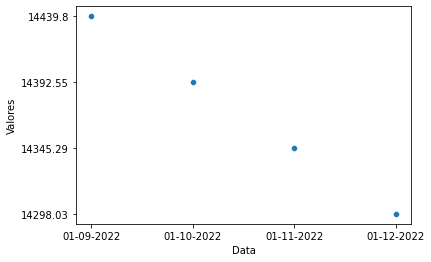

In [99]:
Previsao_valores_linear = list()
Data_Previsao_linear = list()

#Aplicando OrdinalEncoder
enc = OrdinalEncoder()

Base[["codigoFipe","marca", "modelo", "anoModelo", "mesReferencia", "anoReferencia"]] = enc.fit_transform(Base[["codigoFipe","marca", "modelo", "anoModelo", "mesReferencia", "anoReferencia"]])
X = Base[Base.columns[0:6]].values
y = Base.loc[:,'valor'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 10)
X_train.shape
X_test.shape
X_train.shape[0] + X_test.shape[0]
### Instanciando a classe LinearRegression()
modelo = LinearRegression()
### Utilizando o método fit() do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)
modelo.fit(X_train, y_train)
# Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO
#O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.
score_linear = print('R² = {} Quanto a linha de regressão ajusta-se aos dados'.format(modelo.score(X_train, y_train).round(4)))
### Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"
y_previsto = modelo.predict(X_test)
### Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo
print('R² = %s Previsões do nosso modelo' % metrics.r2_score(y_test, y_previsto).round(4))





##########################################################
### Criando um simulador simples
Codigo_Fipe=0.0
Marca=0.0
Modelo=0.0
Ano_do_Modelo=0.0
#simulando tabela fipe do mês de setembro
Mês_Referencia=8.0
#simulando tabela fipe do ano de 2022
Ano_Referencia=15.0
entrada=[[Codigo_Fipe, Marca, Modelo, Ano_do_Modelo, Mês_Referencia, Ano_Referencia ]]
Set = modelo.predict(entrada)[0]

Data_Previsao_linear.append('01/09/2022')
Set = Set.round(2)
Previsao_valores_linear.append(Set)




##########################################################
### Criando um simulador simples
Codigo_Fipe=0.0
Marca=0.0
Modelo=0.0
Ano_do_Modelo=0.0
#simulando tabela fipe do mês de outubro
Mês_Referencia=9.0
#simulando tabela fipe do ano de 2022
Ano_Referencia=15.0
entrada=[[Codigo_Fipe, Marca, Modelo, Ano_do_Modelo, Mês_Referencia, Ano_Referencia ]]
Out = modelo.predict(entrada)[0]

Data_Previsao_linear.append('01/10/2022')
Out = Out.round(2)
Previsao_valores_linear.append(Out)



##########################################################
### Criando um simulador simples
Codigo_Fipe=0.0
Marca=0.0
Modelo=0.0
Ano_do_Modelo=0.0
#simulando tabela fipe do mês de novembro
Mês_Referencia=10.0
#simulando tabela fipe do ano de 2022
Ano_Referencia=15.0
entrada=[[Codigo_Fipe, Marca, Modelo, Ano_do_Modelo, Mês_Referencia, Ano_Referencia ]]
Nov = modelo.predict(entrada)[0]

Data_Previsao_linear.append('01/11/2022')
Nov = Nov.round(2)
Previsao_valores_linear.append(Nov)

##########################################################



Codigo_Fipe=0.0
Marca=0.0
Modelo=0.0
Ano_do_Modelo=0.0
#simulando tabela fipe do mês de dezembro
Mês_Referencia=11.0
#simulando tabela fipe do ano de 2022
Ano_Referencia=15.0
entrada=[[Codigo_Fipe, Marca, Modelo, Ano_do_Modelo, Mês_Referencia, Ano_Referencia ]]
Dez = modelo.predict(entrada)[0]

Data_Previsao_linear.append('01/12/2022')
Dez = Dez.round(2)
Previsao_valores_linear.append(Dez)

#unificando listas
Previsao_Df_linear = list(zip(Data_Previsao_linear,Previsao_valores_linear))

#criando dataframe pandas
estrutura_df = {
    'Data': str,
    'Valores': str
}

Previsao_Df_linear = pd.DataFrame(Previsao_Df_linear, dtype=str)
Previsao_Df_linear.columns = estrutura_df.keys()
Previsao_Df_linear = Previsao_Df_linear.astype(estrutura_df)

#transformando coluna em data
Previsao_Df_linear["Data"] = pd.to_datetime(Previsao_Df_linear["Data"])
#sequencia dia mes ano

Previsao_Df_linear['Data'] = Previsao_Df_linear['Data'].dt.strftime('%m-%d-%Y')

import seaborn as sns 
sns.scatterplot(x="Data", y="Valores", data=Previsao_Df_linear)
Previsao_Df_linear
